# **Movie Recommendation System**

Recommender systems are essential for websites or online stores with millions of items, helping users find what they're looking for by narrowing down their choices. These systems are widely used by companies like Netflix and Amazon to suggest content tailored to individual users.

Our goal is to build a Collaborative Filtering-based Movie Recommendation System. The system will predict how a user would rate a movie they haven’t watched yet, and we aim to minimize the difference between predicted and actual ratings using metrics like RMSE (Root Mean Squared Error).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

!pip install scikit-surprise

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25,5)

import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357271 sha256=3bcfa15539898f4947ad48f84240acb7a93486a89b32f5ca37de645be21cc77e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


**1. Data Collection**

In [ ]:
# Load and prepare the data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

**2. Data Cleaning**

In [ ]:
# Initialize the Reader object with the rating scale
reader = Reader(rating_scale=(1, 5))

# Checking for duplicates
print("No. of duplicates records in the dataset : ", ratings.columns.duplicated().sum())

# Checking the columns' titles and datatypes
ratings.info()

# Checking the number of missing values in data
ratings.isna().sum()

# Checking the columns' titles and datatypes
movies.info()

# Checking the number of missing values in data
movies.isna().sum()

# Checking the feature "userId"
total_users = ratings["userId"].nunique()
print(f"The count of unique userId in the dataset is: {total_users}")

# Checking the feature "movieId"
total_movies = movies["movieId"].nunique()
print(f"The count of unique movieId in the dataset is: {total_movies}")

No. of duplicates records in the dataset :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9128730 entries, 0 to 9128729
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    float64
 2   rating     float64
 3   timestamp  float64
dtypes: float64(3), int64(1)
memory usage: 278.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
The count of unique userId in the dataset is: 63119
The count of unique movieId in the dataset is: 27278


**3. EXPLORATORY DATA ANALYSIS**

<ipython-input-4-ad24f8a19618>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")
<ipython-input-4-ad24f8a19618>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([changing_labels(num) for num in y_ticks])


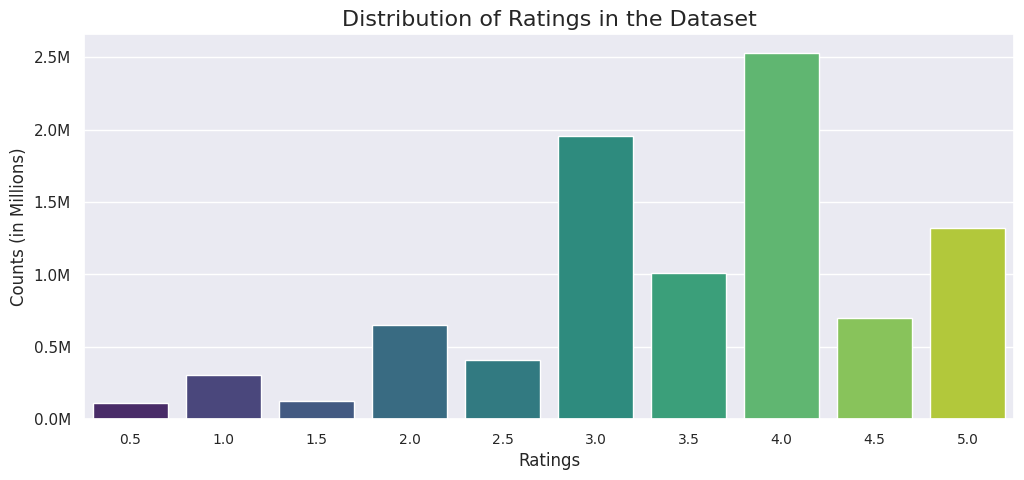

In [ ]:

# Helper function to change the numeric label in terms of Millions
def changing_labels(number):
    return f"{number / 10**6:.1f}M"

# Checking the feature "rating"
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))  # Adjusted for memory and usability
sns.countplot(x="rating", data=ratings, palette="viridis")

y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([changing_labels(num) for num in y_ticks])
plt.title("Distribution of Ratings in the Dataset", fontsize=16)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Counts (in Millions)", fontsize=12)
plt.xticks(fontsize=10)
plt.show()




The count of unique titles in the dataset is: 27262


<ipython-input-5-99956ffcb994>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_genres.index, y=unique_genres.values, palette="viridis")


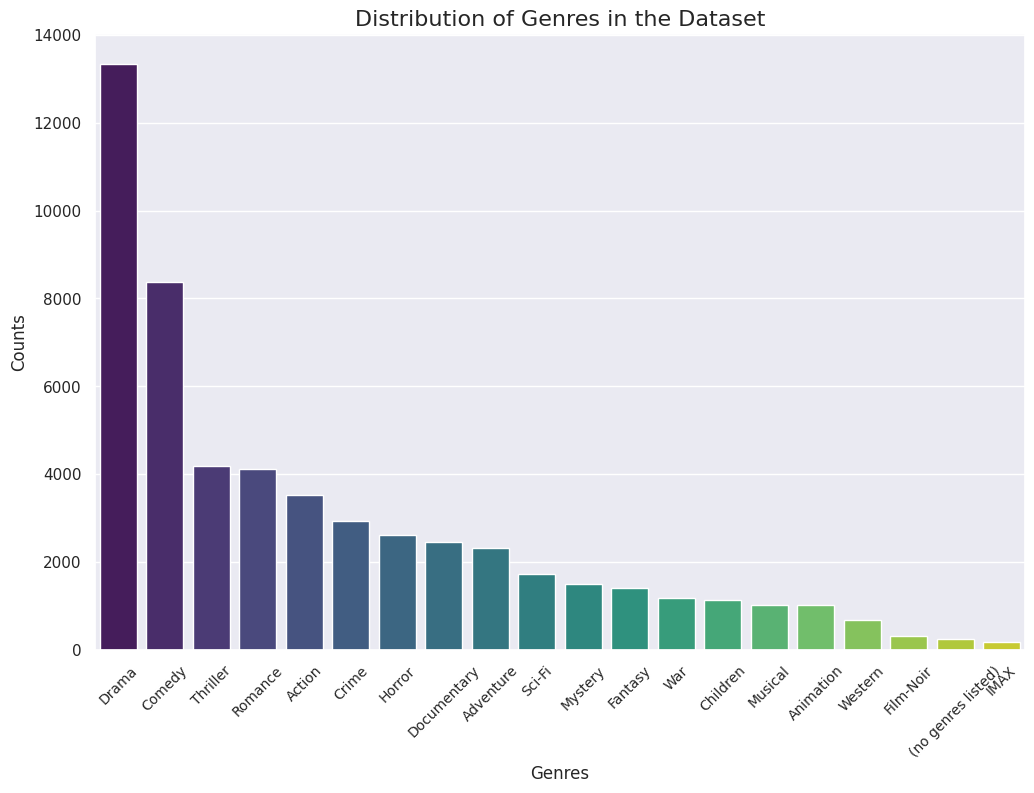

In [ ]:
# Checking the feature "title"
unique_titles = movies["title"].nunique()
print(f"The count of unique titles in the dataset is: {unique_titles}")

# Extract unique Genres and their count
genres_series = movies["genres"].str.split("|").explode()
unique_genres = genres_series.value_counts()

# Visualizing the feature "Genres"
plt.figure(figsize=(12, 8))  # Adjusted for memory
sns.barplot(x=unique_genres.index, y=unique_genres.values, palette="viridis")
plt.title("Distribution of Genres in the Dataset", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

**4. Train and Test Splitting**

In [ ]:
# Load the dataset into the format required by scikit-surprise
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

**5. Model Building & Fitiing**

In [ ]:
# Initialize the SVD model for collaborative filtering
model = SVD()

In [ ]:
# Train the model on the training set
model.fit(trainset)
# Make predictions on the test set
predictions = model.test(testset)

In [ ]:
# Calculate RMSE for evaluation
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 1.8090
RMSE: 1.8089816296205474


# **Generating Recommendations for users**

In [ ]:
def get_movie_recommendations(user_id, num_recommendations=5):
# Get a list of all movie IDs
  movie_ids = ratings['movieId'].unique()
  # Filter out movies the user has already rated
  rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId']
  movies_to_predict = [movie_id for movie_id in movie_ids if movie_id not in rated_movie_ids.values]
  # Predict ratings for each unrated movie
  predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_predict]
  # Sort predictions by estimated rating, descending
  predictions.sort(key=lambda x: x.est, reverse=True)
  # Get the top recommendations
  top_predictions = predictions[:num_recommendations]
  # Fetch movie titles for the top recommendations
  recommended_movie_ids = [pred.iid for pred in top_predictions]
  recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
  # Create a DataFrame for the recommended movies
  recommendations = pd.DataFrame({
    'movieId': recommended_movies['movieId'],
    'title': recommended_movies['title'],
    'estimated_rating': [pred.est for pred in top_predictions]
  })
  return recommendations

In [ ]:
# Example: Get recommendations for a specific user
user_id = 2400
num_recommendations = 10
recommendations = get_movie_recommendations(user_id, num_recommendations)

In [ ]:
print(f"\nTop {num_recommendations} recommendations for user {user_id}:")
print(recommendations)


Top 10 recommendations for user 2400:
     movieId                                       title  estimated_rating
1          2                              Jumanji (1995)                 5
31        32   Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                 5
46        47                 Seven (a.k.a. Se7en) (1995)                 5
49        50                  Usual Suspects, The (1995)                 5
110      112  Rumble in the Bronx (Hont faan kui) (1995)                 5
149      151                              Rob Roy (1995)                 5
220      223                               Clerks (1994)                 5
257      260   Star Wars: Episode IV - A New Hope (1977)                 5
315      318            Shawshank Redemption, The (1994)                 5
333      337          What's Eating Gilbert Grape (1993)                 5


# **Plots**

<ipython-input-14-c489c7efb1b4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


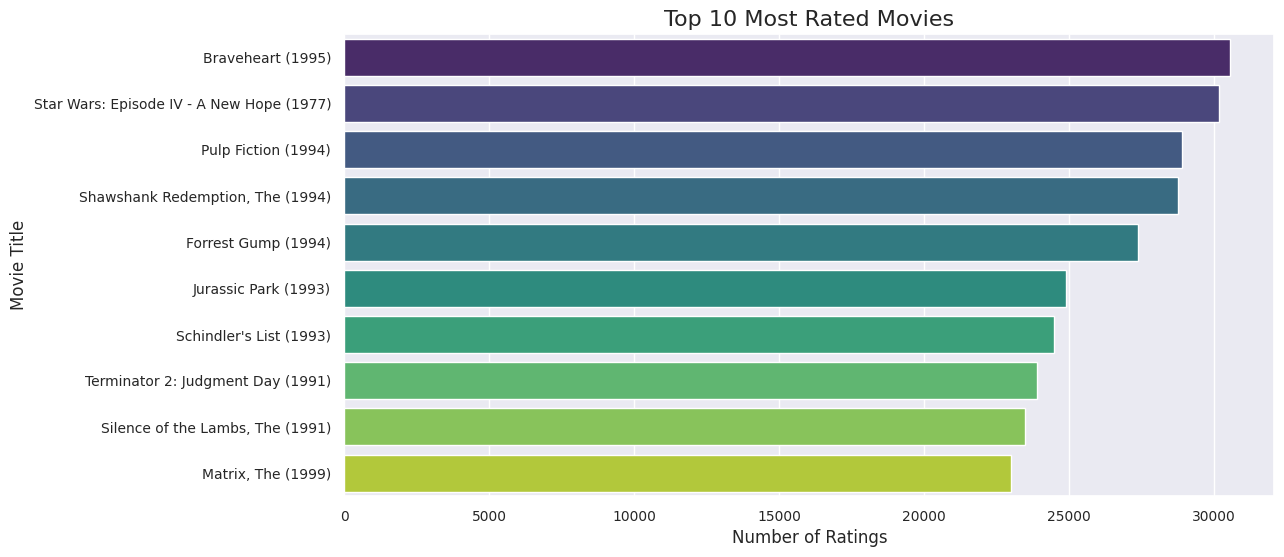

In [ ]:
# Set the theme for consistent visuals
sns.set(style="darkgrid", palette="muted")

# Plot the top 10 most rated movies based on the number of ratings
top_10_most_rated = ratings["movieId"].value_counts().head(10)
top_10_most_rated_movies = movies[movies["movieId"].isin(top_10_most_rated.index)].copy()
top_10_most_rated_movies["num_ratings"] = top_10_most_rated.values

# Plot the top 10 most rated movies
plt.figure(figsize=(12, 6))
sns.barplot(
    x="num_ratings",
    y="title",
    data=top_10_most_rated_movies,
    palette="viridis"
)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Movie Title", fontsize=12)
plt.title("Top 10 Most Rated Movies", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# **Conclusion**

In this project, we learned the importance of Recommendation Systems, the types of recommender systems being implemented, and how to use single value decomposition to enhance a system.

We tried generating recommendations based on Collaborative Filtering techniques.

We tried to predict the ratings for movies that the user might give based on its past rating behaviours and measure the accuracy using RMSE error metrics.

Surely, there is huge scope of improvement and tring out different techniques and ML/DL algorithms.